In [1]:
import numpy as np
import gym
import gym_crumb
from math import radians

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [3]:
env = gym.make("crumb-v0")

WARN: Environment '<class 'gym_crumb.envs.crumb_env.CrumbEnv'>' has deprecated methods. Compatibility code invoked.


In [4]:
from sarsa import SarsaAgent
agent = SarsaAgent(alpha=0.5,epsilon=0.25,discount=0.99)

In [5]:
def play_and_train(env,agent,t_max=10**4):

    total_reward = 0.0
    s = env.reset()
    r = 0
    #env.step((3, radians(0)))
    a = agent.getAction(tuple(s))#<get agent to pick action given state s>
    for t in range(t_max):
        next_s,r, done = env.step(a)
        next_a = agent.getAction(tuple(next_s))
        agent.update(tuple(s), a, tuple(next_s), next_a, r)#<train (update) agent for state s>
        s = next_s
        a = next_a
        total_reward += r
        if done:
            agent.epsilon = agent.epsilon * 0.8
            print agent.epsilon
            break
    return total_reward

mean reward -9.66666666667


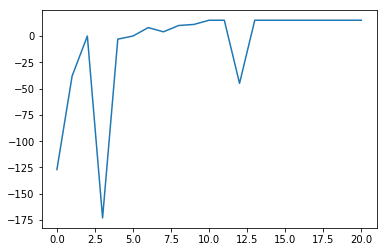

KeyboardInterrupt: 

In [6]:
rewards = []
for i in range(100):
    rewards.append(play_and_train(env,agent))    
    if i %10 ==0:
        clear_output(True)
        print "mean reward",np.mean(rewards[-50:])
        plt.plot(rewards)
        plt.show()

In [1]:
np.mean(rewards[-5:])

NameError: name 'np' is not defined